## <b>■ 텐서 플로우 복습</b>
    1. 텐서 플로우 1.x                              그래프 생성 영역
    2. 텐서 플로우 1.x + keras 2.x                  그래프 실행 영역
    --------------------------------------------------------------------------------------------------------------
    3. 텐서 플로우 2.x                       즉시 실행모드(as 파이썬), 일반 파이썬 코드를 수행할 때 GPU를 사용할 수 있음 (@tf.function)
    
### <b>□ 분류 학습을 위해 신경망에 입력한 이미지들</b>
        1. mnist
        2. 이파리
        3. cifar10
        4. Fashion-mnist
        5. 직접 스크롤링한 사진들 ------ 신경망 활용 홈페이지
        
### <b>■ mnist이미지를 tensorflow 2.x 신경망에 넣고 학습</b>
    1. cnn을 이용하지 않은 코드
    2. cnn을 이용한 코드
    
    본인이 만든 포트폴리오의 머신러닝과 딥러닝 성능을 확인하기 위해 정확도 말고 다른 척도를 뭐를 가지고 확인? (object detection)
        1. 민감도
        2. 특이도
        3. 정밀도
        4. 재현율
        
#### 어제 생성한 mnist 모델의 성능을 평가하시오
    어제 마지막 문제 코드 맨 아래쪽에 아래의 코드를 추가
    print(model.evaluate(x_test, x_val))

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size':13})

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)

sample_size = 3
random_idx = np.random.randint(60000, size = sample_size)

# for idx in random_idx:
#     img = x_train[idx, :]
#     label = y_train[idx]
#     plt.figure()
#     plt.imshow(img)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print(x_train.shape)
print(x_val.shape)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28*28)))/255
x_val = (x_val.reshape((num_x_val, 28*28)))/255
x_test = (x_test.reshape((num_x_test, 28*28)))/255

print(x_train.shape) # 모델 입력을 위해 데이터를 2차원으로 변경
print(x_val.shape)
print(x_test.shape)

# mnist의 라벨 숫자를 One_Hot_encoding 함수
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# print(y_train)
print(y_test)

model = Sequential()

model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()
#
#
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

print(model.evaluate(x_test, y_test))

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]
(42000, 28, 28)
(18000, 28, 28)
(42000, 784)
(18000, 784)
(10000, 784)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 21us/sample - loss: 0.5009 - acc: 0.8551 - val_loss: 0.2346 - val_acc: 0.9343
Epoch 2/30
42000/42000 [==============================] - 1s 18us/sample - loss: 0.1947 - acc: 0.9438 - val_loss: 0.1755 - val_acc: 0.9501
Epoch 3/30
42000/42000 [==============================] - 1s 18us/sample - loss: 0.1467 - acc: 0.9569 - val_loss: 0.1495 - val_acc: 0.9560
Epoch 4/30
42000/42000 [==============================] - 1s 17us/sample - loss: 0.1169 - acc: 0.9658 - val_loss: 0.1390 - val_acc: 0.9589
Epoch 5/30
42000/42000 [==============================] - 1s 18us/sample - loss: 

### ※ 문제149. mnist 이미지를 학습한 신경망 모델이 x_test 데이터를 입력받아 예측한 숫자가 무엇인지 출력하시오

In [4]:
results = model.predict(x_test)
arg_results = np.argmax(results, axis=1)
print(arg_results)

[7 2 1 ... 4 5 6]


### ※ 문제150. 실제 x_test 데이터의 정답 라벨을 확인해서 x_test의 정답인 y_test의 첫번째 숫자가 7이 맞는지 확인하시오

In [7]:
arg_results2 = np.argmax(y_test, axis=1)
np.argmax(y_test[0])

7

### ※ 문제151. 신경망이 1만개의 mnist 테스트 데이터 숫자 중 몇 개를 맞췄는지 혼동행렬을 그려서 확인하시오

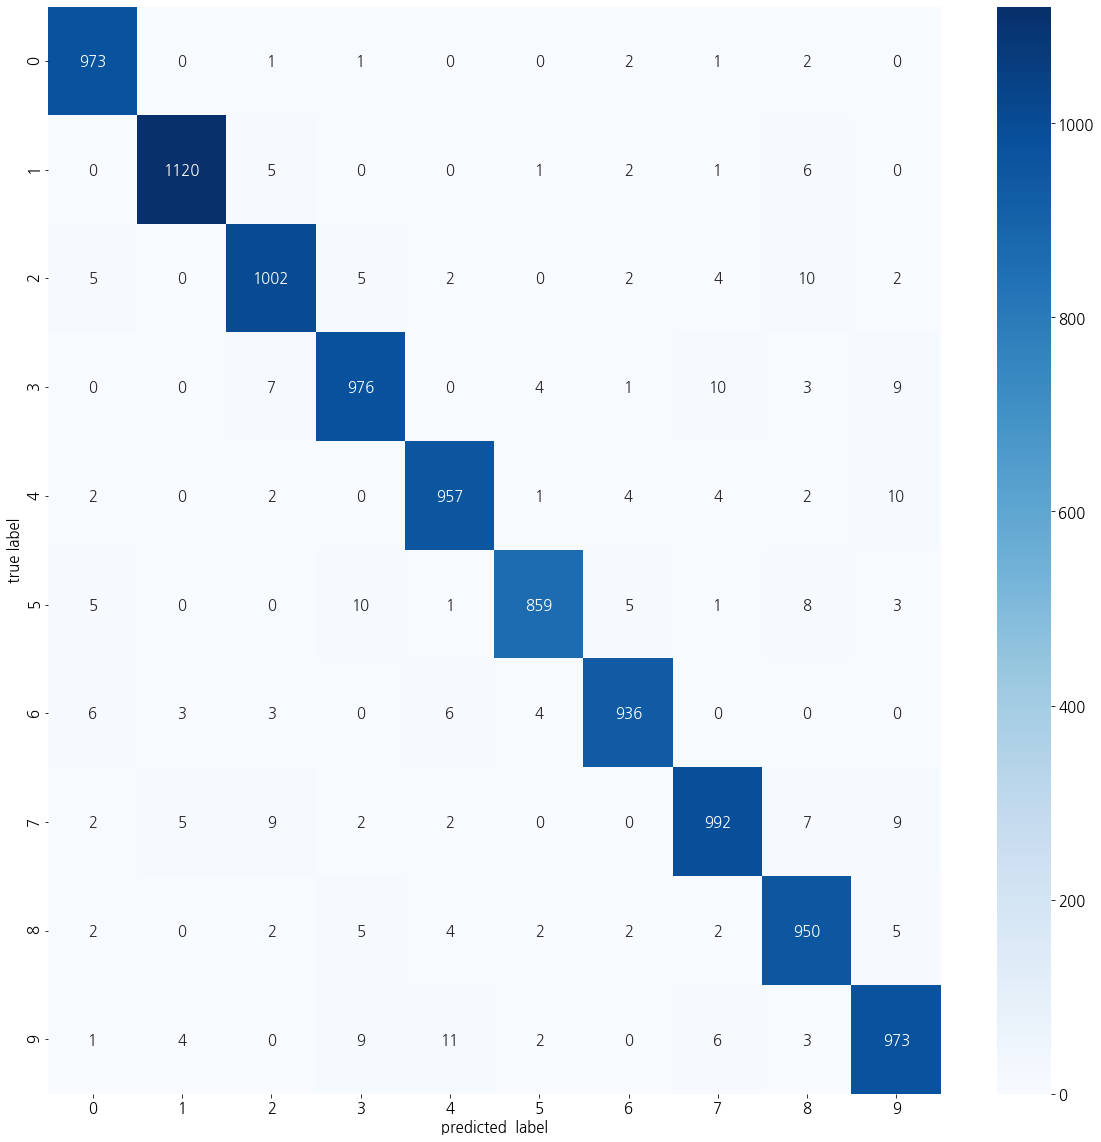

In [15]:
from sklearn.metrics import classification_report,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams.update({'font.size':15})

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('predicted  label')
plt.ylabel('true label')
plt.show()

#### <b>※ 정확도 외에 또다른 성능 척도(정밀도, 재현율, f1 score) 보는 방법</b>

In [12]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### <b>■ 반드시 스스로 코드 구현을 연습해야하는 것</b>
    1. 신경망으로 데이터 로드하는 함수
        - 수업: cifar10 (loader2.py)
        - 연습: 이파리 (loader_leaf.py)
    2. 데이터 분류하는 신경망 생성
        - 수업: mnist (파이썬 날코딩 / tensor 1.x / tensor 2.x ) 
        - 연습: fashion mnist
        
### <b>■ Fashion mnist 데이터 소개 및 코드</b>
    Fashion-MNIST 도 MNIST 와 동일하게 60,000 개의 학습 데이터와 10,000 개의 테스트 데이터로 구성되어있습니다.

    레이블 설명
        0 티셔츠/탑
        1 바지
        2 풀오버(스웨터의 일종)
        3 드레스
        4 코트
        5 샌들
        6 셔츠
        7 스니커즈
        8 가방
        9 앵클 부츠
### <b>▩ Fashion-MNIST 데이터셋 불러오기</b>        

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

import matplotlib.pyplot as plt

import numpy as np

np.random.seed(777)



# Fashion-MNIST의 레이블에 해당하는 품목입니다.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',

               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



sample_size = 9

# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑습니다.

random_idx = np.random.randint(60000, size=sample_size) 



plt.figure(figsize = (5, 5))



for i, idx in enumerate(random_idx):

    plt.subplot(3, 3, i+1)

    plt.xticks([])

    plt.yticks([])

    plt.imshow(x_train[i], cmap = 'gray')

    plt.xlabel(class_names[y_train[i]])

    

plt.show()